### Data Observation for the SF Salaries dataset.
#### this data set represents the Salaries of various Jobs in San Francisco . 
It contains 13 columns and 148655 rows. 
here is a preview of it :
#### source : https://www.kaggle.com/datasets/kaggle/sf-salaries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('./Salaries.csv') 
df.head(5)

/tmp/ipykernel_12672/2477835102.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Salaries.csv')


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


checking for messing values , inconsistencies , and faults in the data 

In [2]:


# Count the number of null values in each column
null_counts = df.isnull().sum()
print(null_counts)


Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64


/tmp/ipykernel_5661/2058181126.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Salaries.csv')


In [3]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


the describe method indicated inapropriate data types in the columns

In [4]:
print(df.dtypes)


Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object


to check mistakes in the data I wanted to inspects why some numeric columns had Object type and what are the incorrect values 


In [6]:

# Create a temporary series where non-convertible entries are NaN
temp_series = pd.to_numeric(df['BasePay'], errors='coerce')

# Find non-numeric entries by checking where temp_series is NaN
non_numeric_entries = df['BasePay'][temp_series.isna()]

print("Non-numeric entries in the column:")
print(non_numeric_entries.unique())
#print(non_numeric_entries.to_string())
#non_numeric_entries.__len__()

Non-numeric entries in the column:
[nan 'Not Provided']


In [7]:

temp_series = pd.to_numeric(df['OvertimePay'], errors='coerce')

non_numeric_entries = df['OvertimePay'][temp_series.isna()]

print("Non-numeric entries in the column:")
print(non_numeric_entries.unique())


Non-numeric entries in the column:
['Not Provided']


In [8]:


temp_series = pd.to_numeric(df['Notes'], errors='coerce')

non_numeric_entries = df['Notes'][temp_series.isna()]

print("Non-numeric entries in the column:")
print(non_numeric_entries.unique())


Non-numeric entries in the column:
[nan]


The previous mistakes are common and easy to handle . But before that I wanted to explore some more in the JobTitle column because of its important role in the data.
Given that any observation I might draw about a job salary will rely on how many times this job appeared in the data set, I started by counting the numbers of time each unique Job appeared. To my surprise, more than half the jobs appeared less than 50 times and most of those appeared less than 20 times. 
I can’t generalize information based on the jobs that rarely appeared and I can’t ignore them either or I’ll lose most of the data!

In [9]:
df['JobTitle'] = df['JobTitle'].str.lower()
Jobs = pd.Series( df['JobTitle'].unique())
Jobs_numbers =  df['JobTitle'].value_counts()
print(Jobs_numbers.to_string())
Jobs_numbers.to_json('job_titles.json')


transit operator                                      9424
special nurse                                         5791
registered nurse                                      4955
custodian                                             3214
firefighter                                           3153
recreation leader                                     2663
deputy sheriff                                        2618
public svc aide-public works                          2518
police officer 3                                      2421
patient care assistant                                1945
public service trainee                                1656
attorney (civil/criminal)                             1503
police officer                                        1476
porter                                                1465
general laborer                                       1410
gardener                                              1187
police officer 2                                      11

because  of jobs appeared less than 20 times , I wanted to group the similar jobs amongst those rare jobs . 
This will allow me to draw conclusions from them as opposed to ignore them because they only appeared few times. 

In [11]:
# to get the jobs that appear less than 20 and merge them together 

# Filtering the DataFrame
rare_jobs = Jobs_numbers[Jobs_numbers < 20]
rare_jobs.to_json('rare_jobs.json')

I used gpt-4-turbo api to analyze all the jobs and their counts and instructed it to take the jobs that appeared less than 20 time. and try to group them together or under another Job that appeared more. 

check the file : "Job_titles_grouping.ipynb" for the code

thee result I got was mostly correct but I changed some of them manually because they weren't on the same level of work hyrarchy or payments . 

#### This dictionary is the end result of grouping rare jobs together.

In [13]:
#I used AI to merge the very similar job titles 
# with additional manual editing

rare_jobs_groups = {
    "Senior Management and Executive Roles": [
        "Chief Surveyor",
        "Chief Deputy Sheriff",
        "Mayor",
        "City Attorney",
        "Chief of Police",
        "Chief, Fire Department",
        "Port Director",
        "Manager VII, MTA",
        "Dept Head V",
        "Deputy Dir I, MTA",
        "Assistant Chief Attorney 2",
        "Assistant Deputy Chief 2",
        "Asst Chf of Dept (Fire Dept)",
        "Admin Analyst 3"
    ],
    "Engineering and Technical Specialist Roles": [
        "Architectural Assistant II",
        "Structural Engineer",
        "Chemist III",
        "Electrical Inspector",
        "Urban Forestry Inspector",
        "Transit Power Line Worker",
        "Senior Power House Operator",
        "Electrical Transit Mechanic, Assistant Supervisor",
        "Engineering Assistant",
        "Utility Analyst",
        "Electrical Transit Shop Sprv 1",
        "Marine Engineer of Fire Boats",
        "Fire Protection Engineer",
        "Transmission and Distribution Line Worker",
        "Landscape Architect"
    ],
    "Senior Medical Roles": [
        "Dentist",
        "Nurse Midwife",
        "Senior Medical Social Worker",
        "Nurse Supervisor Psychiatric"
    ],
    "Medical Specialist Roles": [
        "Dental Hygienist",
        "Microbiologist",
        "Forensic Toxicologist",
        "Veterinary Laboratory Technologist"
    ],
    "Entry-Level Medical Roles": [
        "Dental Aide"
    ],
    "Public Safety and Emergency Services Roles": [
        "Sergeant II (Police Department)",
        "Park Patrol Officer",
        "Assistant Inspector (Police Department)",
        "Mayoral Staff XVI (related to public safety planning)",
        "Transit Manager II",
        "Emergency Services Coordinator",
        "Airport Emergency Planning Coordinator",
        "Emergency Planning Coordinator",
        "Institutional Police Officer",
        "Medical Examiner's Investigator I",
        "Emergency Medical Services Chief"
    ],
    "Legal and Court-Related Roles": [
        "Legal Secretary II",
        "Legal Process Clerk",
        "Court Interpreter",
        "Assistant Chief Victim/Witness Investigator",
        "Mayoral Staff IV (potentially related to legal services)",
        "Court Manager",
        "Court Supervisor II",
        "Deputy Chief Attorney (Civil & Criminal)"
    ],
    "Transportation and Urban Planning Roles": [
        "Transit Operations Specialist",
        "Transportation Planner II",
        "Traffic Signal Electrician",
        "Transit Traffic Checker",
        "Transportation Planner IV",
        "Parking Meter Repairer Sprv 1",
        "Transit Planner IV"
    ],
    "Administrative and Human Resources Roles": [
        "Mayoral Staff XIII",
        "Personnel Clerk",
        "Public Relations Officer",
        "Human Rights Comm Representative",
        "Employee Relations Representative",
        "Personnel/Payroll Representative",
        "Human Resources Director",
        "Employee Assistance Counselor",
        "Benefits Supervisor",
        "Medical Records Tech Sprv",
        "Medical Transcriber Typist",
        "Medical Staff Services Department Specialist"
    ],
    "Environmental and Public Utilities Roles": [
        "Environment Specialist",
        "Water Meter Repairer",
        "Senior Stationary Engineer, Water Treatment Plant",
        "Environmental Health Technician I",
        "Water Quality Technician III",
        "Industrial Hygienist",
        "Environmental Planner"
    ],
    "Science and Laboratory Roles": [
        "Criminalist II",
        "Asst Forensic Toxicologist 1",
        "Biologist III",
        "Supervising Chemist",
        "Senior Microbiologist"
    ],
    "Educational and Community Services Roles": [
        "Recreation Specialist",
        "Child Care Specialist",
        "Social Work Supervisor",
        "Community Development Assistant",
        "Library Commissioner",
        "Education Program Specialist"
    ]
}


In [14]:
role_to_group = {role.lower(): group for group, roles in rare_jobs_groups.items() for role in roles}
print(role_to_group)
# Replace the 'JobTitle' column with the group names
df['JobTitle'] = df['JobTitle'].str.lower().replace(role_to_group)

{'chief surveyor': 'Senior Management and Executive Roles', 'chief deputy sheriff': 'Senior Management and Executive Roles', 'mayor': 'Senior Management and Executive Roles', 'city attorney': 'Senior Management and Executive Roles', 'chief of police': 'Senior Management and Executive Roles', 'chief, fire department': 'Senior Management and Executive Roles', 'port director': 'Senior Management and Executive Roles', 'manager vii, mta': 'Senior Management and Executive Roles', 'dept head v': 'Senior Management and Executive Roles', 'deputy dir i, mta': 'Senior Management and Executive Roles', 'assistant chief attorney 2': 'Senior Management and Executive Roles', 'assistant deputy chief 2': 'Senior Management and Executive Roles', 'asst chf of dept (fire dept)': 'Senior Management and Executive Roles', 'admin analyst 3': 'Senior Management and Executive Roles', 'architectural assistant ii': 'Engineering and Technical Specialist Roles', 'structural engineer': 'Engineering and Technical Spec

any rare job that did not follow a group and/or still appeared less than 20 times are dropped from the data set

In [16]:
Jobs2 = pd.Series( df['JobTitle'].unique())
Jobs_numbers2 =  df['JobTitle'].value_counts()
print(Jobs_numbers2.to_string())
Jobs_numbers2.to_json('Jobs_titles_modified.json')

transit operator                                      9424
special nurse                                         5791
registered nurse                                      4955
custodian                                             3214
firefighter                                           3153
recreation leader                                     2663
deputy sheriff                                        2618
public svc aide-public works                          2518
police officer 3                                      2421
patient care assistant                                1945
public service trainee                                1656
attorney (civil/criminal)                             1503
police officer                                        1476
porter                                                1465
general laborer                                       1410
gardener                                              1187
police officer 2                                      11

In [17]:
invalid_Jobs = Jobs_numbers2[Jobs_numbers2<20].index

In [18]:
invalid_Jobs

Index(['bricklayer', 'mayoral staff iv', 'janitorial svcs asst sprv',
       'fire rescue paramedic', 'transit power line sprv1',
       'emergency med svcs agency spec', 'senior estate investigator',
       'illustrator and art designer', 'automotive trnst shop sprv 1',
       'supervising purchaser',
       ...
       'special assistant xiv', 'deputy sealer of weights and measures',
       'painter supervisor ii', 'mayor's program manager',
       'special assistant xvi', 'assistant director of clinical services ii',
       'zoo curator', 'conservatorship/case mgnt supv',
       'institutional police lieutenant', 'chief victim/witness investigator'],
      dtype='object', length=851)

In [19]:
df = df[~df['JobTitle'].isin(invalid_Jobs)]


In [20]:
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,captain iii (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,captain iii (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"battalion chief, (fire department)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"battalion chief, (fire department)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
11,12,PATRICIA JACKSON,captain iii (police department),99722.0,87082.62,110804.3,NaN,297608.92,297608.92,2011,NaN,San Francisco,NaN


In [21]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,143453.000000,143453.000000,143453.000000,143453.000000,0.0
mean,75059.847413,74123.081944,93099.677210,2012.538525,NaN
std,42705.937678,50383.865627,62749.219438,1.113089,NaN
min,2.000000,-618.130000,-618.130000,2011.000000,NaN
25%,38280.000000,34735.050000,42360.830000,2012.000000,NaN
50%,75150.000000,70785.820000,91974.600000,2013.000000,NaN
75%,111959.000000,105357.220000,132470.030000,2014.000000,NaN
max,148654.000000,538909.280000,538909.280000,2014.000000,NaN


In [22]:
Jobs2 = pd.Series( df['JobTitle'].unique())
Jobs_numbers2 =  df['JobTitle'].value_counts()
print(Jobs_numbers2.to_string())

transit operator                                      9424
special nurse                                         5791
registered nurse                                      4955
custodian                                             3214
firefighter                                           3153
recreation leader                                     2663
deputy sheriff                                        2618
public svc aide-public works                          2518
police officer 3                                      2421
patient care assistant                                1945
public service trainee                                1656
attorney (civil/criminal)                             1503
police officer                                        1476
porter                                                1465
general laborer                                       1410
gardener                                              1187
police officer 2                                      11

replacing invalid and null values in the data

In [23]:
df = df[df['JobTitle'] != 'Not Provided']
df = df[df['BasePay'] != 'Not Provided']

In [24]:
df['Agency'] = df['Agency'].str.lower()
Agency = pd.Series( df['Agency'].unique())
Agency =  df['Agency'].value_counts()
print(Agency.to_string())


san francisco    143453


In [25]:

Year = pd.Series( df['Year'].unique())
Year =  df['Year'].value_counts()
print(Year.to_string())


2014    37216
2013    36646
2012    35766
2011    33825


In [26]:

Status = pd.Series( df['Status'].unique())
Status =  df['Status'].value_counts()
print(Status.to_string())


FT    21655
PT    15561


In [27]:
df = df.drop(['Notes','EmployeeName','Agency'], axis=1)


In [28]:
df.head(5)

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
1,2,captain iii (police department),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN
2,3,captain iii (police department),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN
6,7,"battalion chief, (fire department)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN
8,9,"battalion chief, (fire department)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN
11,12,captain iii (police department),99722.0,87082.62,110804.3,NaN,297608.92,297608.92,2011,NaN


In [29]:
# we will assume that the status of the Job is full time if not provided
df['Status'] = df['Status'].fillna('FT')


### Calculating Missing 'BasePay'
You can calculate 'BasePay' when it's missing by rearranging the formula for 'TotalPay':

BasePay = TotalPay - (OvertimePay + OtherPay)


### Calculating Missing 'Benefits'
Similarly, 'Benefits' can be calculated from 'TotalPayBenefits':

Benefits = TotalPayBenefits - TotalPay





In [31]:
df.replace('Not Provided', 0, inplace=True)


In [34]:

df.fillna(0 , inplace=True)
temp_series = pd.to_numeric(df['OtherPay'], errors='coerce')
non_numeric_entries = df['OtherPay'][temp_series.isna()]
print("Non-numeric entries in the column:")
print(non_numeric_entries.unique())


Non-numeric entries in the column:
[]


In [36]:
# Calculate missing BasePay
df['BasePay'] = df.apply(lambda row: row['TotalPay'] - (row['OvertimePay'] + row['OtherPay']) if pd.isna(row['BasePay']) else row['BasePay'], axis=1)

# Calculate missing Benefits
df['Benefits'] = df.apply(lambda row: row['TotalPayBenefits'] - row['TotalPay'] if pd.isna(row['Benefits']) else row['Benefits'], axis=1)

# Update TotalPayBenefits if necessary
df['TotalPayBenefits'] = df.apply(lambda row: row['TotalPay'] + row['Benefits'] if pd.isna(row['TotalPayBenefits']) else row['TotalPayBenefits'], axis=1)


In [38]:
df.head(30)

,Id,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Status
1,2,captain iii (police department),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,FT
2,3,captain iii (police department),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,FT
6,7,"battalion chief, (fire department)",92492.01,89062.9,134426.14,0,315981.05,315981.05,2011,FT
8,9,"battalion chief, (fire department)",176932.64,86362.68,40132.23,0,303427.55,303427.55,2011,FT
11,12,captain iii (police department),99722.0,87082.62,110804.3,0,297608.92,297608.92,2011,FT
14,15,"battalion chief, (fire department)",174872.64,74050.3,37424.11,0,286347.05,286347.05,2011,FT
17,18,"captain, emergencycy medical services",140546.87,119397.26,18625.08,0,278569.21,278569.21,2011,FT
18,19,"battalion chief, (fire department)",168692.63,69626.12,38115.47,0,276434.22,276434.22,2011,FT
22,23,"captain, fire suppression",140546.88,93200.58,39955.25,0,273702.71,273702.71,2011,FT
23,24,"battalion chief, (fire department)",168692.63,77896.14,24083.86,0,270672.63,270672.63,2011,FT


In [39]:
df['BasePay'] = df['BasePay'].astype(float)
df['OvertimePay'] = df['OvertimePay'].astype(float)
df['OtherPay'] = df['OtherPay'].astype(float)
df['Benefits'] = df['Benefits'].astype(float)


In [41]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,143453.000000,143453.000000,143453.000000,143453.000000,143453.000000,143453.000000,143453.000000,143453.000000
mean,75059.847413,65363.273113,5122.714955,3637.093877,18976.595266,74123.081944,93099.677210,2012.538525
std,42705.937678,42622.808144,11501.315303,7857.173972,17078.360167,50383.865627,62749.219438,1.113089
min,2.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,38280.000000,31428.860000,0.000000,0.000000,2.850000,34735.050000,42360.830000,2012.000000
50%,75150.000000,64419.730000,0.000000,826.670000,23471.980000,70785.820000,91974.600000,2013.000000
75%,111959.000000,94168.640000,4772.770000,4264.900000,33451.190000,105357.220000,132470.030000,2014.000000
max,148654.000000,319275.010000,245131.880000,342802.630000,91302.460000,538909.280000,538909.280000,2014.000000


In [ ]:
condition = (
    (df['BasePay'] < 0) |
    (df['OvertimePay'] < 0) |
    (df['OtherPay'] < 0) |
    (df['Benefits'] < 0) |
    (df['TotalPay'] < 0) |
    (df['TotalPayBenefits'] < 0)
)
negative_values = df[condition]
print(negative_values)


In [44]:
df = df[~condition]

In [46]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,143432.000000,143432.000000,143432.000000,143432.000000,143432.000000,143432.000000,143432.000000,143432.000000
mean,75057.601923,65370.690374,5123.439011,3637.600252,18978.560703,74131.729637,93110.290340,2012.538520
std,42707.744880,42619.931473,11502.000173,7857.570361,17078.271638,50381.207804,62745.712167,1.113142
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,38274.750000,31446.665000,0.000000,0.000000,2.877500,34777.455000,42405.997500,2012.000000
50%,75150.500000,64428.000000,0.000000,827.180000,23476.385000,70790.960000,91984.350000,2013.000000
75%,111962.250000,94181.667500,4775.600000,4265.195000,33452.072500,105365.467500,132477.957500,2014.000000
max,148650.000000,319275.010000,245131.880000,342802.630000,91302.460000,538909.280000,538909.280000,2014.000000


In [47]:
df = df[~((df['OvertimePay'] == 0)& (df['OtherPay'] == 0) & (df['Benefits'] == 0))]


## Finally cleaning the data is complete

In [50]:
# I'm saving the cleaned data before I start the next step
df.to_csv('cleaned1.csv', index=False)

In [5]:
df = pd.read_csv('cleaned1.csv', index_col=0)


## Visualization


this plot shows the regression relation ship between the BasePay and Total

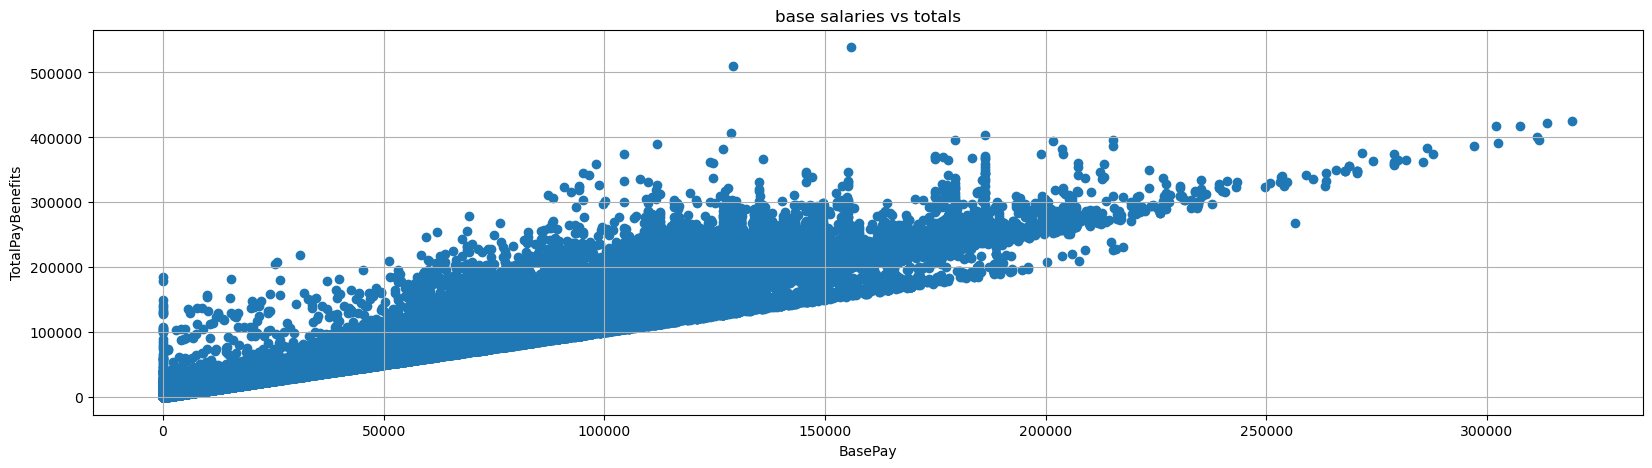

In [6]:
plt.figure(figsize=(20, 5))
plt.scatter(df['BasePay'], df['TotalPayBenefits'])
plt.title('base salaries vs totals')
plt.xlabel('BasePay')
plt.ylabel('TotalPayBenefits')
plt.grid(True)
plt.show()

To observe the spread and outliers in base pay, overtime pay, other pay, and benefits 
for a few selected job titles (to keep the plot readable).

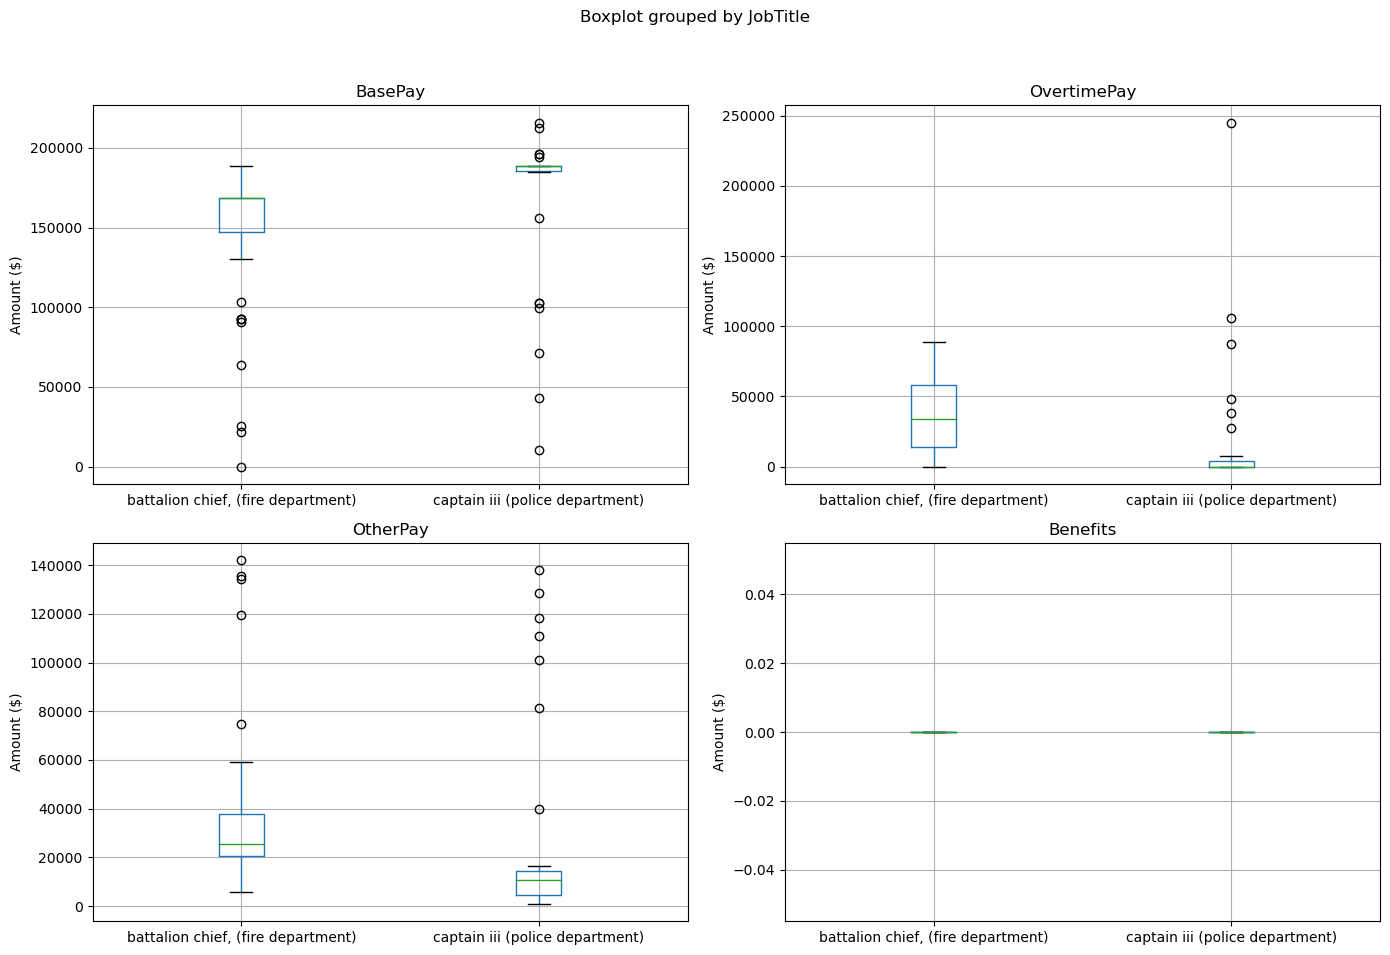

In [8]:

job_titles = ['captain iii (police department)', 'battalion chief, (fire department)']
filtered_df = df[df['JobTitle'].isin(job_titles)]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Pay Component Distribution by Job Title')

components = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for i, comp in enumerate(components):
    ax = axes[i//2, i%2]
    filtered_df.boxplot(column=comp, by='JobTitle', ax=ax)
    ax.set_title(comp)
    ax.set_xlabel('')
    ax.set_ylabel('Amount ($)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


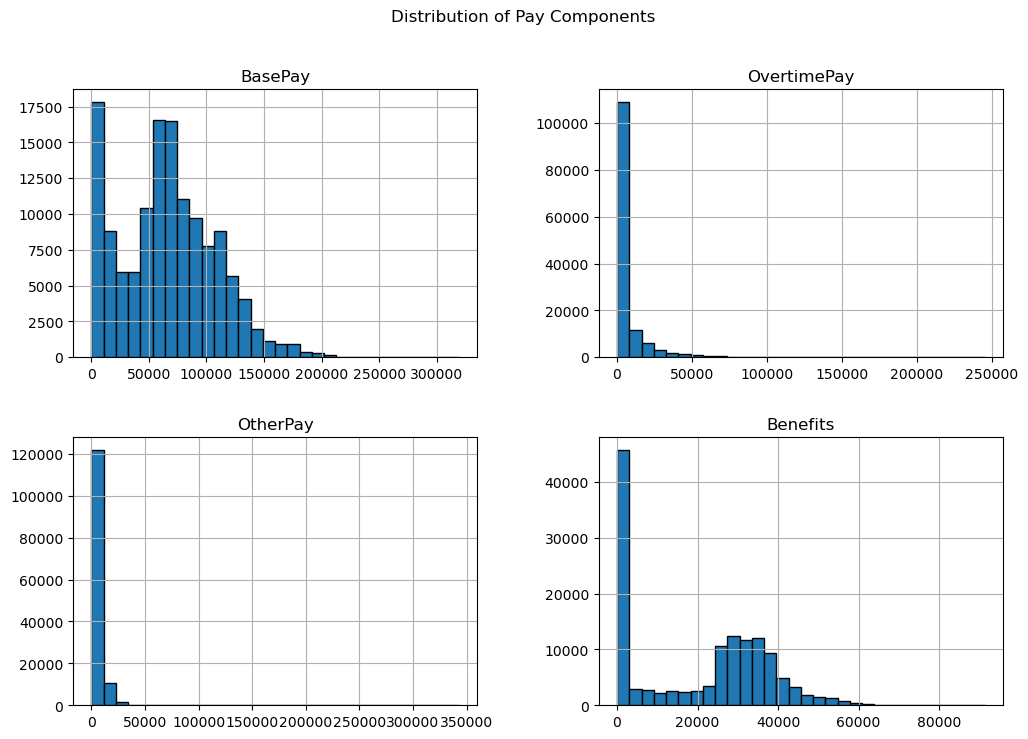

In [11]:
# Plot histograms for pay components
df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle('Distribution of Pay Components')
plt.show()


a heat map for the correlation between pay types

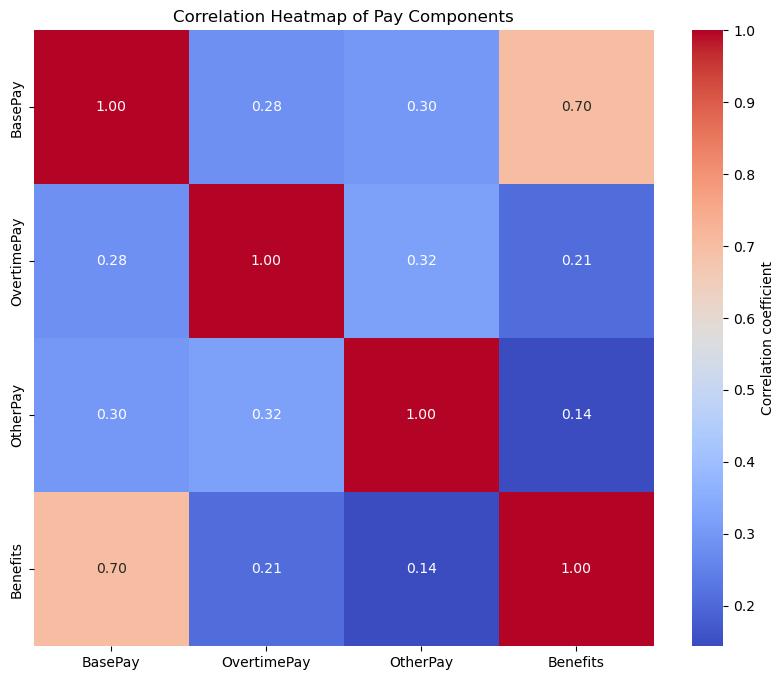

In [12]:

# Calculating correlations
correlation_matrix = df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']].corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Heatmap of Pay Components')
plt.show()


/home/si76ra/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


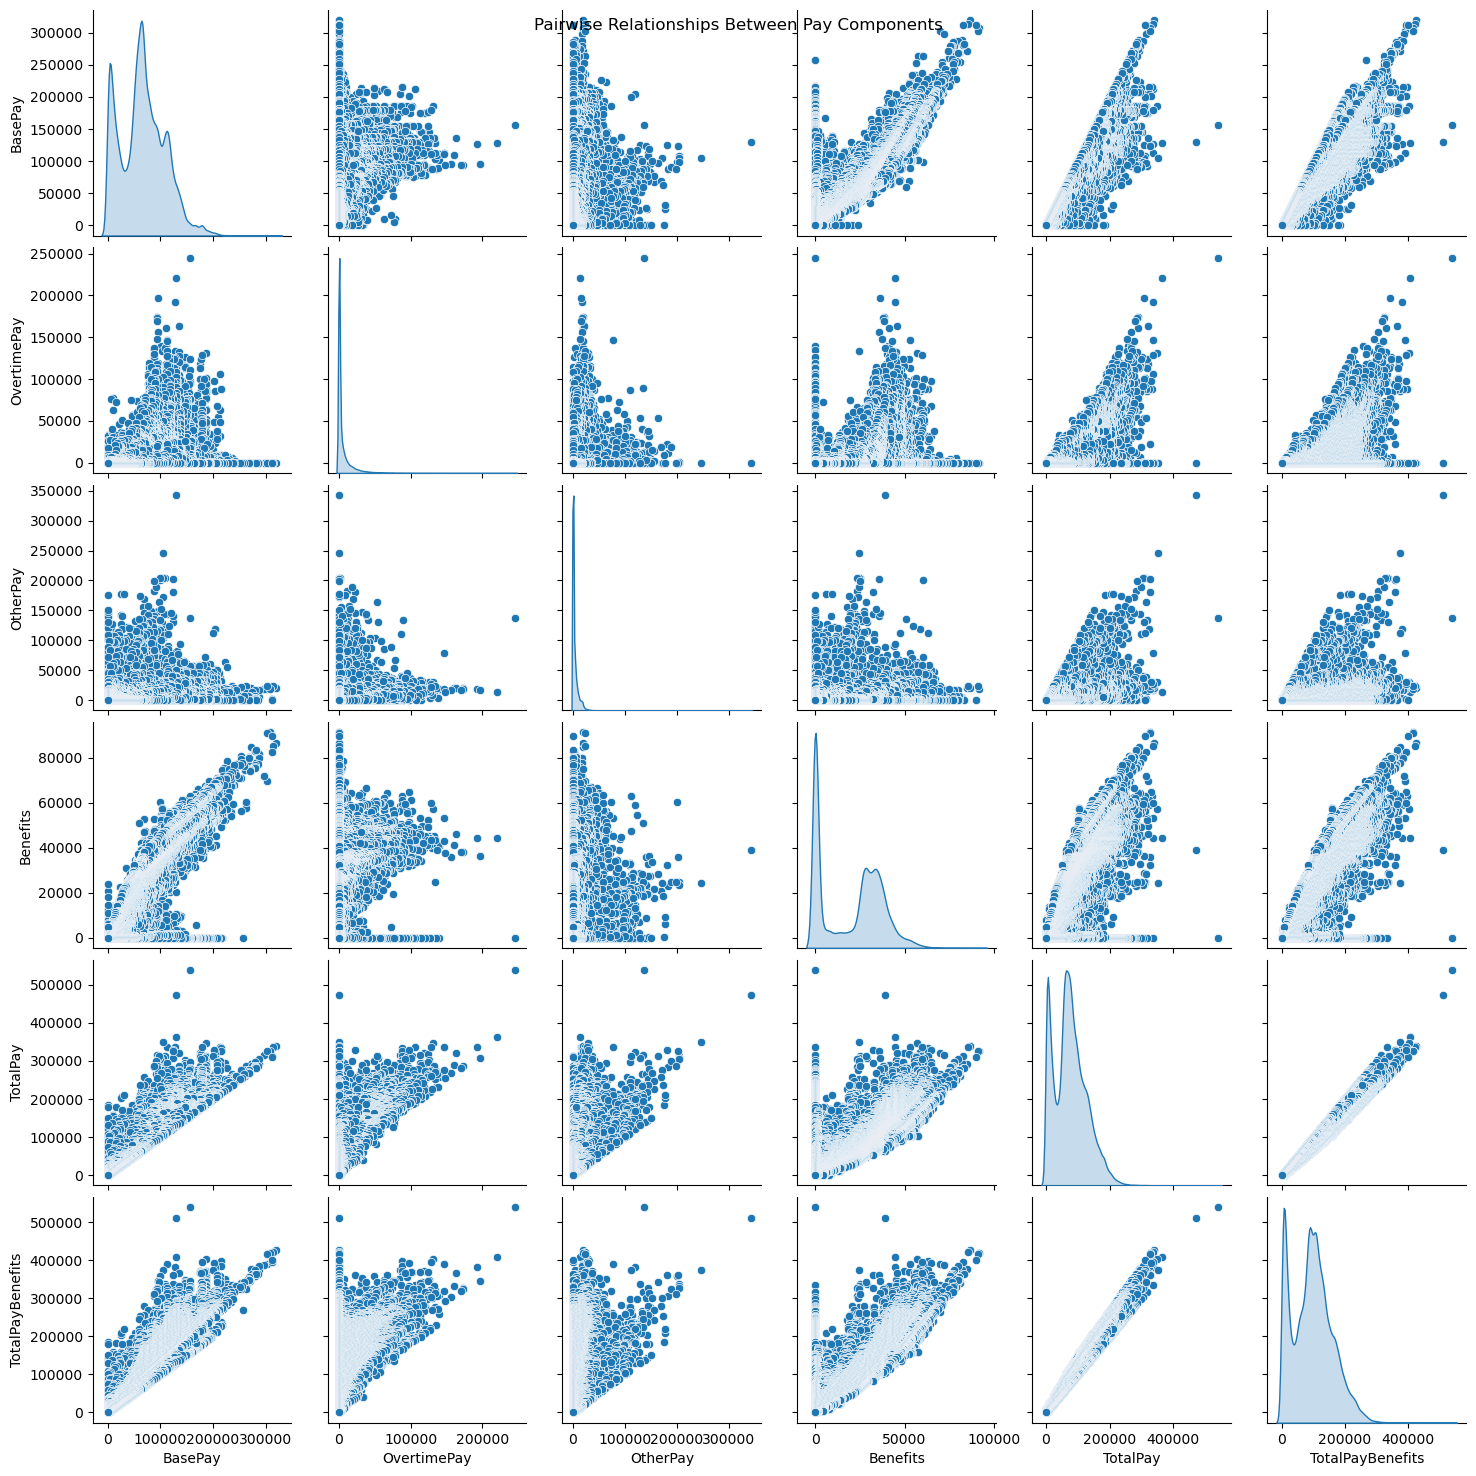

In [13]:
# Using seaborn's pairplot to visualize relationships between columns
sns.pairplot(df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']], diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Pay Components')
plt.show()


Analyze how the total compensation trends for different job titles have changed over the available years, especially focusing on the change in benefits.


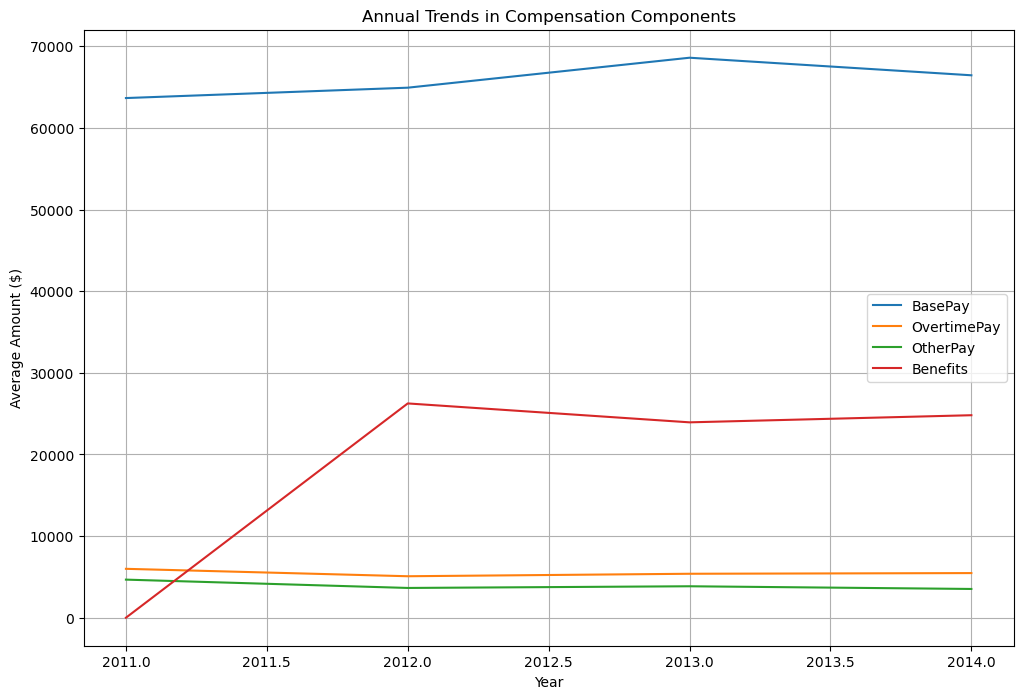

In [14]:
# Grouping by year and plotting trends
df_grouped_by_year = df.groupby('Year').mean()
plt.figure(figsize=(12, 8))
for column in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    plt.plot(df_grouped_by_year.index, df_grouped_by_year[column], label=column)
plt.title('Annual Trends in Compensation Components')
plt.xlabel('Year')
plt.ylabel('Average Amount ($)')
plt.legend()
plt.grid(True)
plt.show()

 to perform a numerical analysis, you could use techniques to convert "Job Title" into a numerical form, like label encoding or one-hot encoding, and then use these in a model to predict Total Pay. However, this wouldn't give you a correlation coefficient but could indicate the importance of Job Title in predicting Total Pay.
 to perform a numerical analysis, you could use techniques to convert "Job Title" into a numerical form, like label encoding or one-hot encoding, and then use these in a model to predict Total Pay. However, this wouldn't give you a correlation coefficient but could indicate the importance of Job Title in predicting Total Pay.

In [15]:
Jobs = pd.Series( df['JobTitle'].unique())
Jobs_count =  df['JobTitle'].value_counts()
print(Jobs_count.to_string())
Jobs_count.to_json('jobs_counts_cleaned1.json')

transit operator                                      9328
special nurse                                         5654
registered nurse                                      4945
custodian                                             3172
firefighter                                           3150
deputy sheriff                                        2613
recreation leader                                     2545
public svc aide-public works                          2502
police officer 3                                      2391
patient care assistant                                1943
police officer                                        1476
porter                                                1441
general laborer                                       1398
public service trainee                                1392
attorney (civil/criminal)                             1212
gardener                                              1182
police officer 2                                      11

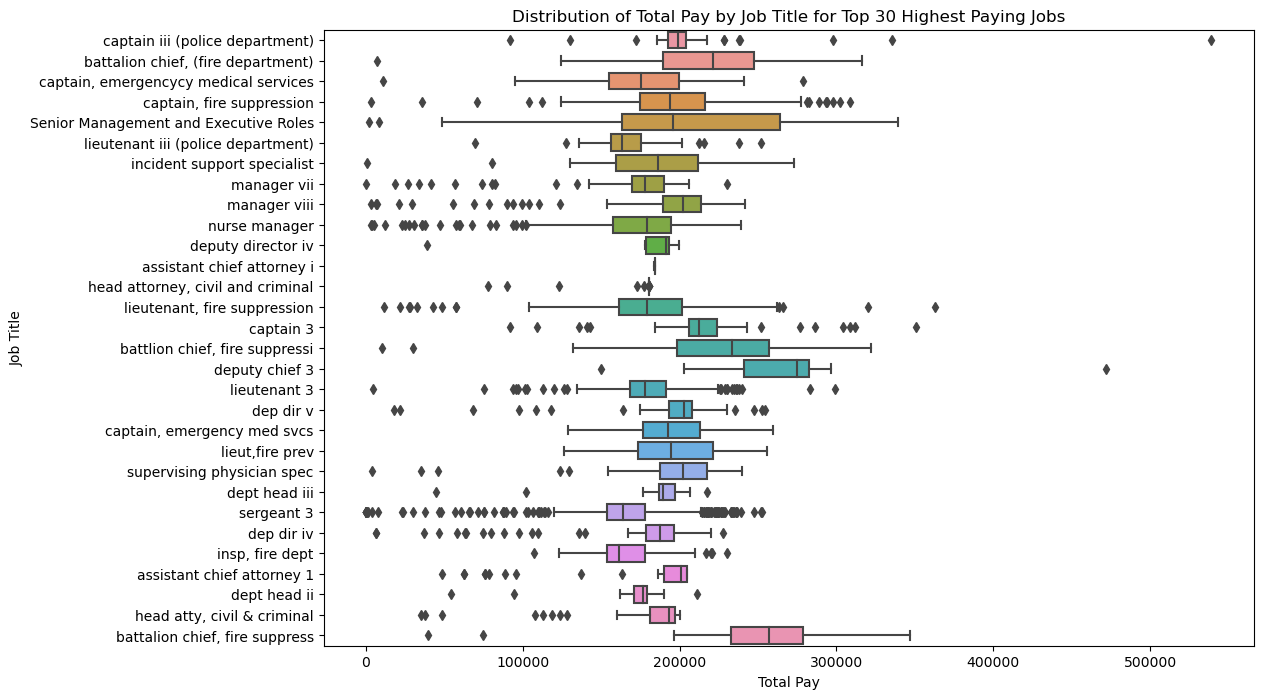

In [18]:

# Calculating mean Total Pay for each Job Title
mean_total_pay_by_job_title = df.groupby('JobTitle')['TotalPay'].mean().sort_values(ascending=False)

#limit the number of job titles displayed for readability
top_job_titles = mean_total_pay_by_job_title.head(30).index
filtered_df = df[df['JobTitle'].isin(top_job_titles)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='TotalPay', y='JobTitle', data=filtered_df)
plt.title('Distribution of Total Pay by Job Title for Top 30 Highest Paying Jobs')
plt.xlabel('Total Pay')
plt.ylabel('Job Title')
plt.show()
